<a href="https://colab.research.google.com/github/dkmachinelearning/dkmachinelearning/blob/main/Pipelines/Pipeline_excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basecode from https://blog.prokulski.science/2020/10/10/pipeline-w-scikit-learn/
import pandas as pd

# być może coś narysujemy
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [6]:
#pip install catboost
#!pip install dask[dataframe]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.5 MB/s eta 0:00:00


In [7]:
from sklearn.model_selection import train_test_split

# modele
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# preprocessing
## zmienne ciągłe
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
## zmienne kategoryczne
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# dodatkowe modele spoza sklearn
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [8]:
# dane nie mają nagłówka - samo sobie nadamy nazwy kolumn
col_names= ['age', 'work_class', 'final_weight', 'education', 'education_num',
            'marital_status', 'occupation', 'relationship', 'race', 'sex',
            'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
            'year_income']

# wczytujemy dane
adult_dataset = pd.read_csv("/content/adult.data",
                            engine='python', sep=', ', # tu jest przeciek i spacja!
                            header=None, names=col_names,
                            na_values="?")

# kolumna 'final_weight' do niczego się nie przyda, więc od razu ją usuwamy
# wiadomo to z EDA, które tutaj pomijamy
adult_dataset.drop('final_weight', axis=1, inplace=True)

# usuwamy braki, żeby uprościć przykład
adult_dataset.dropna(inplace=True)

In [51]:
adult_dataset['year_income'].replace(['>50K', '<=50K'],
                        [0, 1], inplace=True)

<ipython-input-51-30c828417451>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_dataset['year_income'].replace(['>50K', '<=50K'],
<ipython-input-51-30c828417451>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult_dataset['year_income'].replace(['>50K', '<=50K'],


In [52]:
adult_dataset.dtypes

## age                int64
## work_class        object
## education         object
## education_num      int64
## marital_status    object
## occupation        object
## relationship      object
## race              object
## sex               object
## capital_gain       int64
## capital_loss       int64
## hours_per_week     int64
## native_country    object
## year_income       object
## dtype: object

,0
age,int64
work_class,object
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object
capital_gain,int64


In [53]:
X_train, X_test, y_train, y_test = train_test_split(adult_dataset.drop('year_income', axis=1),
                                                    adult_dataset['year_income'],
                                                    test_size=0.3,
                                                    random_state=42)

In [54]:
# lista kolumn numerycznych
cols_numerical = X_train.select_dtypes(exclude=['object']).columns

# transformer dla kolumn numerycznych
transformer_numerical = Pipeline(steps = [
    ('num_trans', StandardScaler())
])

In [55]:
# lista kolumn kategorycznych
cols_categorical = X_train.select_dtypes(include=['object']).columns

# transformer dla kolumn numerycznych
transformer_categorical = Pipeline(steps = [
    ('cat_trans', OneHotEncoder())
])

In [56]:
# preprocesor danych
preprocessor = ColumnTransformer(transformers = [
    ('numerical', transformer_numerical, cols_numerical),
    ('categorical', transformer_categorical, cols_categorical)
])

In [57]:
pipe = Pipeline(steps = [
                ('preprocessor', preprocessor),
                ('classifier', RandomForestClassifier())
            ])

In [58]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_trans',
                                                                   StandardScaler())]),
                                                  Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_trans',
                                                                   OneHotEncoder())]),
                                                  Index(['work_class', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [59]:
pipe.predict(X_test)

array([1, 1, 1, ..., 0, 1, 1])

In [60]:
pipe.predict_proba(X_test)

array([[0.06      , 0.94      ],
       [0.19128571, 0.80871429],
       [0.25083333, 0.74916667],
       ...,
       [0.67589683, 0.32410317],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [61]:
pipe.score(X_test, y_test)

0.8421925074593878

In [62]:
# klasyfikatory
classifiers = [
    DummyClassifier(strategy='stratified'),
    LogisticRegression(max_iter=5000), # można tutaj podać hiperparametry
    KNeighborsClassifier(2), # 2 bo mamy dwie klasy
    ExtraTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    XGBClassifier(),
    CatBoostClassifier(silent=True),
    LGBMClassifier(verbose=-1)
]

# transformatory dla kolumn liczbowych
scalers = [StandardScaler(), MinMaxScaler(), Normalizer()]

# transformatory dla kolumn kategorycznych
cat_transformers = [OrdinalEncoder(), OneHotEncoder()]

In [63]:
# miejsce na zebranie wyników
models_df = pd.DataFrame()

# przygotowujemy pipeline
pipe = Pipeline(steps = [
    ('preprocessor', preprocessor), # mniejszy pipeline
    ('classifier', None) # to ustalimy za moment
])

# dla każdego typu modelu zmieniamy kolejne transformatory kolumn
for model in classifiers:
    for num_tr in scalers:
        for cat_tr in cat_transformers:
            # odpowiednio zmieniamy jego paramety - dobieramy transformatory
            pipe_params = {
                'preprocessor__numerical__num_trans': num_tr,
                'preprocessor__categorical__cat_trans': cat_tr,
                'classifier': model
            }
            pipe.set_params(**pipe_params)

            # trenujemy tak przygotowany model (cały pipeline) mierząc ile to trwa
            start_time = time.time()
            pipe.fit(X_train, y_train)
            end_time = time.time()

            # sprawdzamy jak wyszło
            score = pipe.score(X_test, y_test)

            # zbieramy w dict parametry dla Pipeline i wyniki
            param_dict = {
                        'model': model.__class__.__name__,
                        'num_trans': num_tr.__class__.__name__,
                        'cat_trans': cat_tr.__class__.__name__,
                        'score': score,
                        'time_elapsed': end_time - start_time
            }
            models_df = pd.concat([models_df, pd.DataFrame(param_dict, index=[0])])
           # models_df = models_df.concat(pd.DataFrame(param_dict, index=[0]))
            #print(pd.DataFrame(param_dict, index=[0]))
models_df.reset_index(drop=True, inplace=True)

In [64]:
models_df.sort_values('score', ascending=False)

,model,num_trans,cat_trans,score,time_elapsed
43,CatBoostClassifier,StandardScaler,OneHotEncoder,0.871809,7.094253
45,CatBoostClassifier,MinMaxScaler,OneHotEncoder,0.871809,8.584745
39,XGBClassifier,MinMaxScaler,OneHotEncoder,0.871699,0.339934
51,LGBMClassifier,MinMaxScaler,OneHotEncoder,0.870925,0.368226
49,LGBMClassifier,StandardScaler,OneHotEncoder,0.870925,0.372847
37,XGBClassifier,StandardScaler,OneHotEncoder,0.870814,0.319950
44,CatBoostClassifier,MinMaxScaler,OrdinalEncoder,0.870593,9.129599
42,CatBoostClassifier,StandardScaler,OrdinalEncoder,0.870593,9.272102
36,XGBClassifier,StandardScaler,OrdinalEncoder,0.868936,0.352848
50,LGBMClassifier,MinMaxScaler,OrdinalEncoder,0.868936,0.350188


In [65]:
models_df[['model', 'score', 'time_elapsed']] \
    .groupby('model') \
    .aggregate({
        'score': ['mean','std', 'min', 'max'],
        'time_elapsed': ['mean','std', 'min', 'max']
        }) \
    .reset_index() \
    .sort_values(('score', 'mean'), ascending=False)

model     score                                \
                               mean       std       min       max   
0      CatBoostClassifier  0.867333  0.006025  0.859100  0.871809   
4          LGBMClassifier  0.866247  0.005777  0.858658  0.870925   
8           XGBClassifier  0.865934  0.006571  0.856559  0.871699   
6  RandomForestClassifier  0.843316  0.002579  0.840866  0.847607   
5      LogisticRegression  0.826390  0.025799  0.783291  0.850260   
7                     SVC  0.806461  0.041817  0.747817  0.853243   
2     ExtraTreeClassifier  0.793955  0.002130  0.791469  0.796663   
3    KNeighborsClassifier  0.774763  0.007285  0.768925  0.787048   
1         DummyClassifier  0.625483  0.004962  0.616643  0.630898   

  time_elapsed                                  
          mean       std        min        max  
0     8.745332  0.989460   7.094253  10.005768  
4     0.381617  0.025092   0.350188   0.423674  
8     0.341362  0.055292   0.271935   0.439245  
6     9.894560  7.854764   2.015898  18.783891  
5     0.660338  0.542413   0.209778   1.343674  
7    19.425118  3.490905  15.355661  23.298539  
2     0.170742  0.116742   0.062999   0.291952  
3     0.077528  0.018534   0.059451   0.100638  
1     0.058759  0.003394   0.054484   0.063631

<Axes: xlabel='score', ylabel='model'>

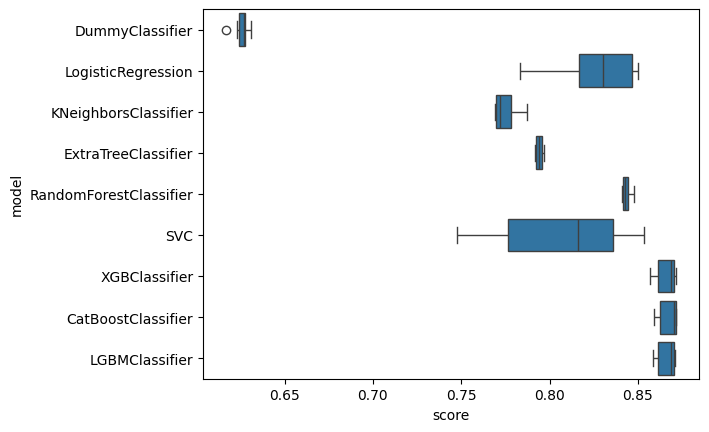

In [66]:
sns.boxplot(data=models_df, x='score', y='model')

<Axes: xlabel='score', ylabel='num_trans'>

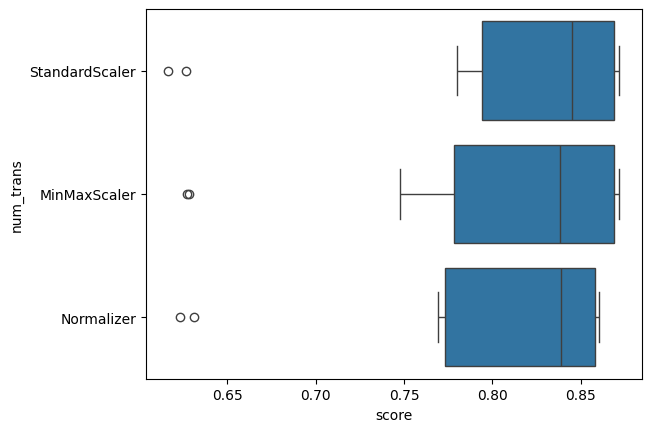

In [67]:
sns.boxplot(data=models_df, x='score', y='num_trans')

<Axes: xlabel='score', ylabel='cat_trans'>

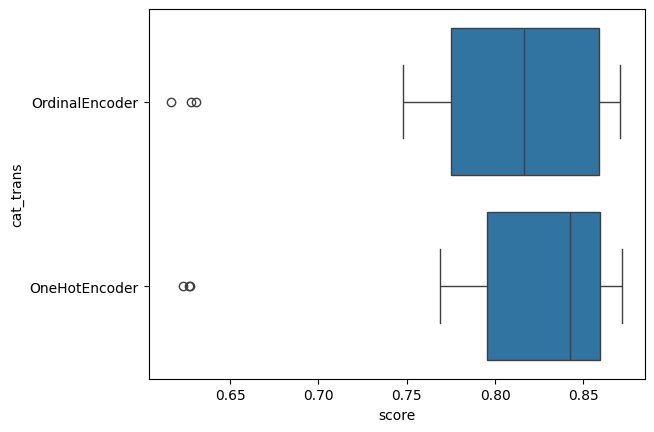

In [68]:
sns.boxplot(data=models_df, x='score', y='cat_trans')

<Axes: xlabel='time_elapsed', ylabel='model'>

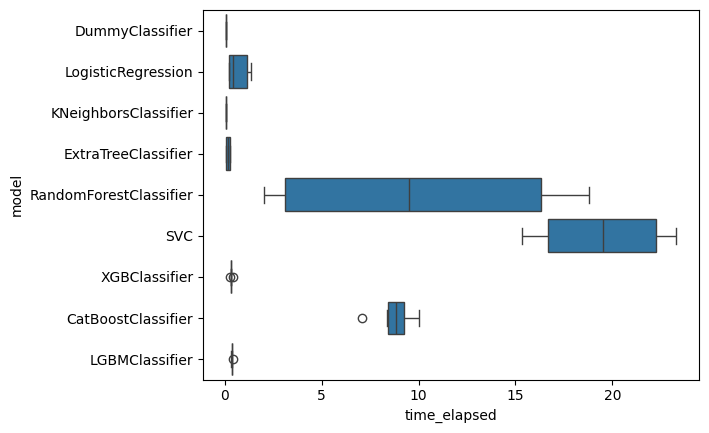

In [69]:
sns.boxplot(data=models_df, x='time_elapsed', y='model')